In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Step 2: Load the features and target
X = pd.read_csv('X_with_cluster_distances.csv')
Y = pd.read_csv('Y.csv')

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# Targets
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Confirm the shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_small, _, y_train_small, _ = train_test_split(
    X_train_scaled, y_train, train_size=0.5, stratify=y_train, random_state=42
)

# Results storage
final_results = []

Training features shape: (8171, 13)
Testing features shape: (2043, 13)
Training labels shape: (8171, 1)
Testing labels shape: (2043, 1)



=== Linear SVM (No Transform) ===


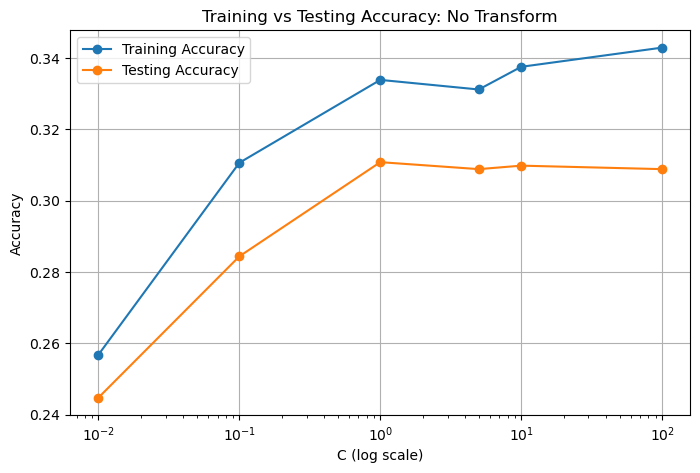


Precision and Recall Table (No Transform):


,C,Precision,Recall
0,0.01,0.191476,0.244738
1,0.10,0.211993,0.284386
2,1.00,0.262430,0.310817
3,5.00,0.262443,0.308860
4,10.00,0.280658,0.309838
5,100.00,0.277969,0.308860


In [2]:
# No Transform (Linear SVM)
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []

C_values = [0.01, 0.1, 1, 5, 10, 100]

print("\n=== Linear SVM (No Transform) ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'No Transform',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot Training vs Testing Accuracy
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: No Transform')
plt.legend()
plt.grid(True)
plt.show()

# Output Precision and Recall Table
prec_recall_table = pd.DataFrame({
    'C': C_values,
    'Precision': precision_list,
    'Recall': recall_list
})
print("\nPrecision and Recall Table (No Transform):")
display(prec_recall_table)


=== SVM with Polynomial Kernel (Degree 2) ===


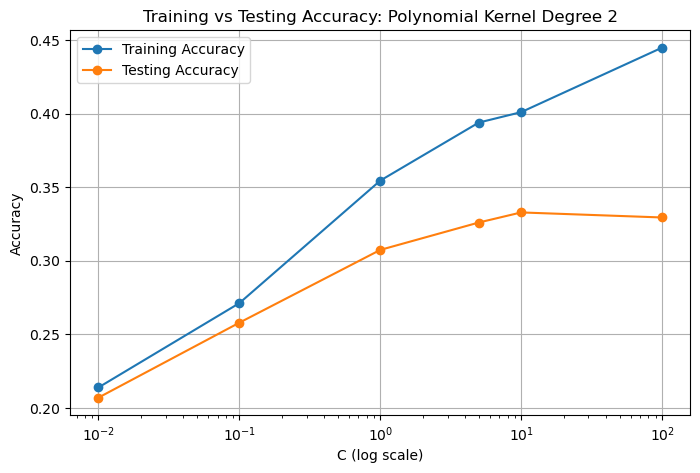


Precision and Recall Table (Polynomial Kernel Degree 2):


,C,Precision,Recall
0,0.01,0.183844,0.207048
1,0.10,0.182749,0.257954
2,1.00,0.268260,0.307391
3,5.00,0.308682,0.325991
4,10.00,0.314569,0.332844
5,100.00,0.306855,0.329418


In [3]:
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 5, 10, 100]

print("\n=== SVM with Polynomial Kernel (Degree 2) ===")

for C in C_values:
    model = SVC(C=C, kernel='poly', degree=2, gamma='scale', coef0=1, random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Poly Kernel Degree 2',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Polynomial Kernel Degree 2')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Polynomial Kernel Degree 2):")
display(prec_recall_table)


=== SVM with Polynomial Kernel (Degree 3) ===


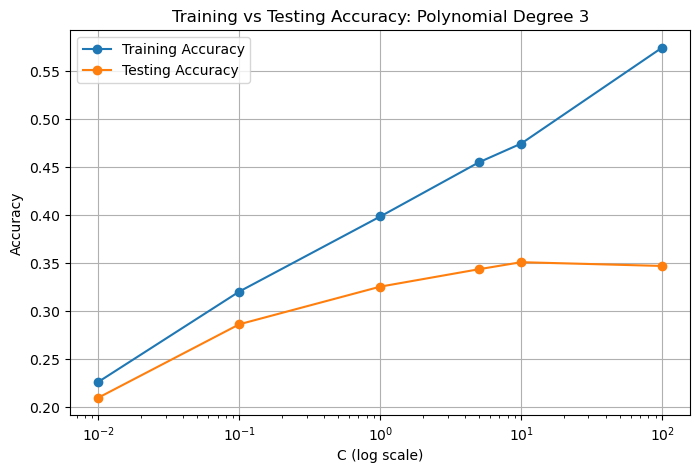


Precision and Recall Table (Polynomial Degree 3):


,C,Precision,Recall
0,0.01,0.185609,0.209985
1,0.10,0.239977,0.286344
2,1.00,0.302868,0.325502
3,5.00,0.320804,0.343612
4,10.00,0.327488,0.350954
5,100.00,0.334486,0.347039


In [5]:
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 5, 10, 100]

print("\n=== SVM with Polynomial Kernel (Degree 3) ===")

for C in C_values:
    model = SVC(C=C, kernel='poly', degree=3, gamma='scale', coef0=1, random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Poly Kernel Degree 3',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)
# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Polynomial Degree 3')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Polynomial Degree 3):")
display(prec_recall_table)


=== SVM with Polynomial Kernel (Degree 4) ===


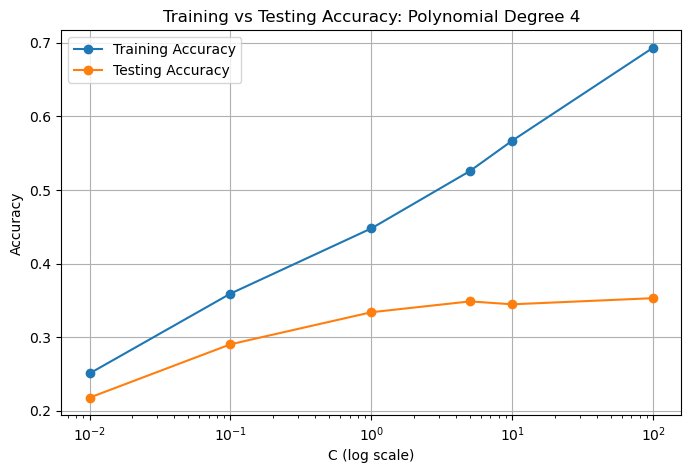


Precision and Recall Table (Polynomial Degree 4):


,C,Precision,Recall
0,0.01,0.185448,0.217817
1,0.10,0.256038,0.290259
2,1.00,0.307646,0.333823
3,5.00,0.329710,0.348507
4,10.00,0.328877,0.344591
5,100.00,0.344568,0.352912


In [6]:
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 5, 10, 100]

print("\n=== SVM with Polynomial Kernel (Degree 4) ===")

for C in C_values:
    model = SVC(C=C, kernel='poly', degree=4, gamma='scale', coef0=1, random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Poly Kernel Degree 4',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Polynomial Degree 4')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Polynomial Degree 4):")
display(prec_recall_table)


=== Log Transform ===


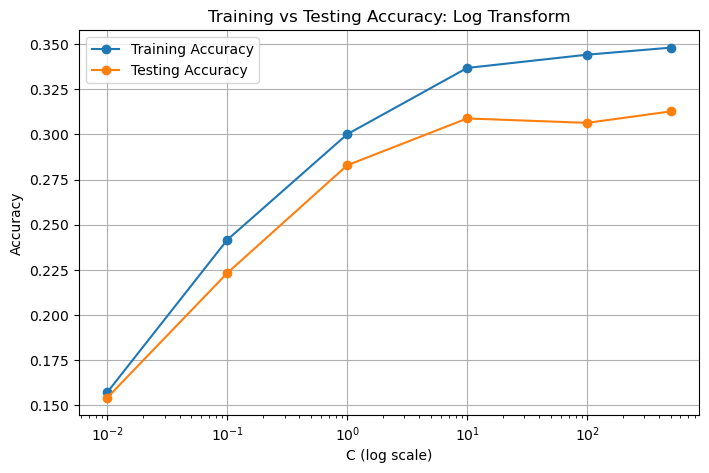


Precision and Recall Table (Log Transform):


,C,Precision,Recall
0,0.01,0.047547,0.154185
1,0.10,0.147092,0.223201
2,1.00,0.212026,0.282917
3,10.00,0.256006,0.308860
4,100.00,0.272110,0.306412
5,500.00,0.278861,0.312775


In [7]:
# Log Transform
X_train_log = np.log(X_train_small + 1e-5 - np.min(X_train_small))
X_test_log = np.log(X_test_scaled + 1e-5 - np.min(X_train_small))

train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 10, 100, 500]
print("\n=== Log Transform ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_log, y_train_small)

    y_train_pred = model.predict(X_train_log)
    y_test_pred = model.predict(X_test_log)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Log Transform',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Log Transform')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Log Transform):")
display(prec_recall_table)


=== RBF Kernel ===


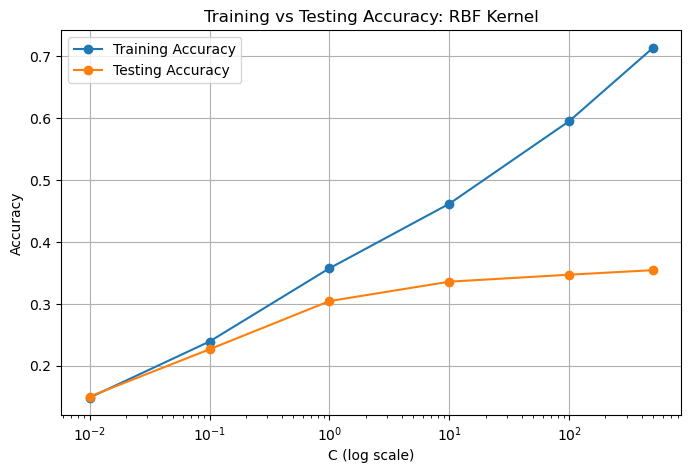


Precision and Recall Table (RBF Kernel):


,C,Precision,Recall
0,0.01,0.050251,0.150269
1,0.10,0.138060,0.226628
2,1.00,0.280375,0.304454
3,10.00,0.311172,0.335781
4,100.00,0.334555,0.347039
5,500.00,0.347143,0.354381


In [8]:
# RBF Kernel
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 10, 100, 500]
print("\n=== RBF Kernel ===")

for C in C_values:
    model = SVC(C=C, kernel='rbf', gamma='scale', random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'RBF Kernel',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (RBF Kernel):")
display(prec_recall_table)

In [9]:
# Final Results Table
final_results_df = pd.DataFrame(final_results)
from IPython.display import display
display(final_results_df)
final_results_df.to_csv('svm_final_metrics_results.csv', index=False)

,Transformation,C,Train Accuracy,Test Accuracy,Precision,Recall
0,No Transform,0.01,0.256793,0.244738,0.191476,0.244738
1,No Transform,0.10,0.310649,0.284386,0.211993,0.284386
2,No Transform,1.00,0.333905,0.310817,0.262430,0.310817
3,No Transform,5.00,0.331212,0.308860,0.262443,0.308860
4,No Transform,10.00,0.337576,0.309838,0.280658,0.309838
5,No Transform,100.00,0.342962,0.308860,0.277969,0.308860
6,Poly Kernel Degree 2,0.01,0.213953,0.207048,0.183844,0.207048
7,Poly Kernel Degree 2,0.10,0.271236,0.257954,0.182749,0.257954
8,Poly Kernel Degree 2,1.00,0.354468,0.307391,0.268260,0.307391
9,Poly Kernel Degree 2,5.00,0.393880,0.325991,0.308682,0.325991
